<a href="https://colab.research.google.com/github/kaazima/Bank-Personal-Loan-Classification/blob/main/Logistic%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bank Personal Loan Classification

Universal bank is a small but growing bank. The majority of customers are liability, or deposit only customers, and the bank is interested in converting more of them into asset, or borrowing, customers. The bank has had past success with marketing campaigns to convert the liability customers to personal loan customers. With that success, the bank is interested in being more targeted with its efforts to ensure marketing dollars are spent on those most likely to convert. The bank would like a model to help it predict which new customers are likely to become personal loan customers to aid in this targeting.

## Business Question

Can we predict which new customers are most likely to say yes to a personal loan?

## Import Necessary packages

In [ ]:
import pandas as pd
from time import time
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## Dataset Analysis

In [ ]:
bank_df = pd.read_csv('https://raw.githubusercontent.com/Nuthi-Sriram/Bank_Loan_Modelling/master/UniversalBank.csv')
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
# Drop columns that are not significant
bank_df = bank_df.drop(['ID', 'ZIP Code'], axis=1)
bank_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [ ]:
print('Shape:', bank_df.shape)

Shape: (5000, 12)


In [ ]:
bank_df['Personal Loan'].value_counts().rename_axis('Personal Loan').to_frame('No of customers')

,No of customers
Personal Loan,
0,4520
1,480


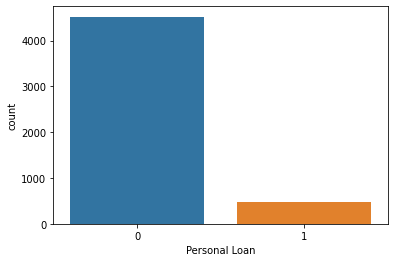

In [ ]:
sns.countplot(bank_df['Personal Loan'])



*   90.4% of the total customers take personal loan
*   9.6% of the total customers do not take personal loan
*   So, the dataset is skewed and we need to deal with this imbalanced dataset



## Split dataset into train & test

In [ ]:
feature = bank_df.copy().drop('Personal Loan', axis=1)
target = bank_df['Personal Loan']

In [ ]:
# Split the data into trainx, testx, trainy, testy with test_size = 0.20 using sklearn
x_train, x_test, y_train, y_test = train_test_split(feature, target, stratify=target, random_state=5, test_size=0.20)

In [ ]:
# Print the shape of x_train, x_test, y_train, y_test
print('Shape of x_train :', x_train.shape)
print('Shape of x_test  :', x_test.shape)
print('Shape of y_train :', y_train.shape)
print('Shape of y_test  :', y_test.shape)

Shape of x_train : (4000, 11)
Shape of x_test  : (1000, 11)
Shape of y_train : (4000,)
Shape of y_test  : (1000,)


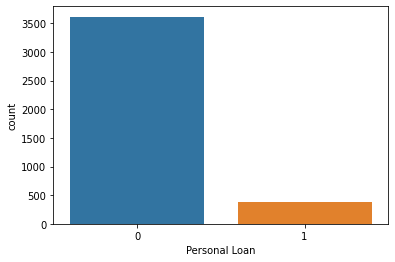

In [ ]:
sns.countplot(y_train)

## Preprocessing the dataset

*   We can balance the dataset either by Up sampling the minority class or Down sampling the majority class. But as the dataset is too small, Down sampling the majority class will not help, so we will Up sample the minority Class.

*   If up sampling is done before splitting the dataset into a train and test set, then it could end up with the same observation in both datasets.

*   As a result, a machine learning model will be able to perfectly predict the value for those observations when predicting on the test set, hence inflating the accuracy and recall.

*   So, up sampling should be done only on the train set, after splitting the dataset into train and test.

In [ ]:
# Balance the dataset by oversampling technique
smote = SMOTE(random_state = 10)
x_train, y_train = smote.fit_sample(x_train, y_train)

In [ ]:
# Scale data to obtain zero mean and unit variance
scaler = StandardScaler() 
x_train = scaler.fit_transform(x_train)  
x_test = scaler.transform(x_test)

In [ ]:
# Print the shape of x_train, x_test, y_train, y_test after oversampling
print('Shape of x_train :', x_train.shape)
print('Shape of x_test  :', x_test.shape)
print('Shape of y_train :', y_train.shape)
print('Shape of y_test  :', y_test.shape)

Shape of x_train : (7232, 11)
Shape of x_test  : (1000, 11)
Shape of y_train : (7232,)
Shape of y_test  : (1000,)


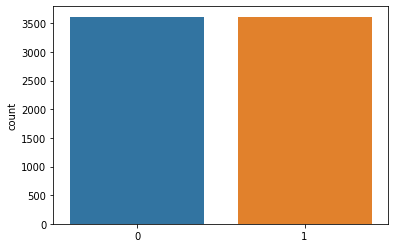

In [ ]:
sns.countplot(y_train)

## Logistic Regression

In [ ]:
# Create Logistic Regression object
logistic_regression = LogisticRegression()

In [ ]:
t = time()
# Train the model
logistic_regression.fit(x_train, y_train)
# Time is rounded to 3 decimal in seconds
print("Training time:", round(time()-t, 3), "s")

Training time: 0.041 s


In [ ]:
# Predict train data set
pred_train = logistic_regression.predict(x_train)
# Predict test data set
pred_test = logistic_regression.predict(x_test)

#### Performance of our model

In [ ]:
print("Accuracy on train is:", accuracy_score(y_train, pred_train))
print("Accuracy on test is:", accuracy_score(y_test, pred_test))

Accuracy on train is: 0.9077710176991151
Accuracy on test is: 0.894


In [ ]:
# Checking performance of our model with classification report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       904
           1       0.47      0.85      0.61        96

    accuracy                           0.89      1000
   macro avg       0.73      0.88      0.77      1000
weighted avg       0.93      0.89      0.91      1000



In [ ]:
# Checking performance of our model with ROC Score
print('ROC Score:', roc_auc_score(y_test, pred_test))

ROC Score: 0.8761983775811208


In [ ]:
# list the default parameters of the model
logistic_regression.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## Hyper Parameter Tuning

In [ ]:
# List hyper parameters that we wish to tune
params = {'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'penalty': ['l1', 'l2'], 'C': [100, 10, 1.0, 0.1, 0.01]}
# Use grid search
grid = GridSearchCV(logistic_regression, verbose=1, param_grid=params, scoring='roc_auc', cv=10, n_jobs=-1)

In [ ]:
# Train the model
grid.fit(x_train, y_train)
print()

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:    4.0s


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    6.7s finished


In [ ]:
print('Best Score:', grid.best_score_)
print('Best Parameters:', grid.best_params_)

Best Score: 0.9682648428080783
Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
best_logistic_regression = grid.best_estimator_
# print best hyper parameters
print(best_logistic_regression)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
t = time()
# Train the model
best_logistic_regression.fit(x_train, y_train)
# Time is rounded to 3 decimal in seconds
print("Training time:", round(time()-t, 3), "s")

Training time: 0.138 s


In [ ]:
# Predict train data set
pred_train = best_logistic_regression.predict(x_train)
# Predict test data set
pred_test = best_logistic_regression.predict(x_test)

In [ ]:
print("Accuracy on train is:", accuracy_score(y_train, pred_train))
print("Accuracy on test is:", accuracy_score(y_test, pred_test))

Accuracy on train is: 0.9074944690265486
Accuracy on test is: 0.896


#### Confusion matrix for Train data

In [ ]:
# Print confusion matrix for train data
print(confusion_matrix(y_train, pred_train))

[[3261  355]
 [ 314 3302]]


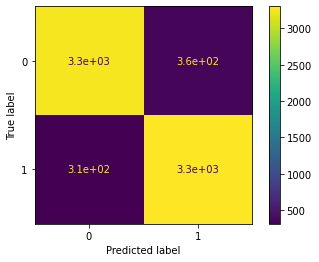

In [ ]:
# Plot confusion matrix for train data
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, pred_train), display_labels=grid.classes_).plot()

#### Confusion matrix for Test data

In [ ]:
# Print confusion matrix for test data
print(confusion_matrix(y_test, pred_test))

[[813  91]
 [ 13  83]]


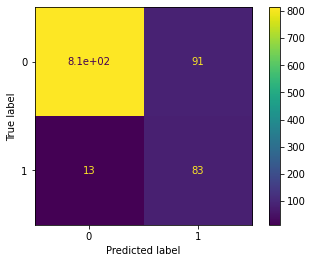

In [ ]:
# Plot confusion matrix for test data
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, pred_test), display_labels=grid.classes_).plot()

#### Performance of our model

In [ ]:
# Checking performance of our model with classification report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       904
           1       0.48      0.86      0.61        96

    accuracy                           0.90      1000
   macro avg       0.73      0.88      0.78      1000
weighted avg       0.94      0.90      0.91      1000



In [ ]:
# Checking performance of our model with ROC Score
print('ROC Score:', roc_auc_score(y_test, pred_test))

ROC Score: 0.8819598082595871


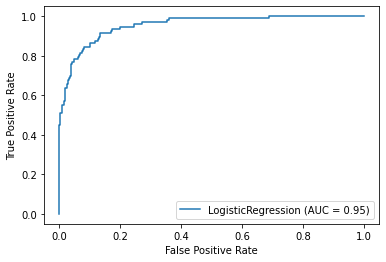

In [ ]:
# Plot ROC Curve
plot_roc_curve(best_logistic_regression, x_test, y_test)

## Overall Analysis



*   This is an imbalanced dataset. So, I have upsampled the train data and preprocessed the data using StandardScaler to obtain 0 mean and unit variance. Doing this improved the accuracy and ROC score of the model to a great extent.

*   Also, I have used stratify parameter to preserve the proportion of target as in original dataset, in the train and test datasets as well.

*   As per the results, accuracy is around 0.9. But, it can be observed that our dataset is skewed. So, instead of considering accuracy as our metric, we need to consider ROC_AUC score for highly skewed datasets.

*   Default parameters of the model gave an ROC score of 0.876, whereas after hyperparamter tuning, ROC score raised to 0.881.

*   Before upsampling the data, accuracy was 0.94, which fell to 0.9 after upsampling. But, ROC score raised from 0.796 to 0.88, which is a performance improvement. Precision fell from 0.75 to 0.48, and recall raised from 0.61 to 0.86 which is the ideal value for our model.

*   For our dataset, we want the recall to be high as we don't want the model to predict loan customers as non-loan customers. So, though there is a precision/recall tradeoff here, we can go ahead with this model.

